# Border Crossing Data Project

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df=pd.read_csv("Border_Crossing_Entry_Data.csv")

In [3]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 0:00,Trucks,545


In [4]:
df.tail()

,Port Name,State,Port Code,Border,Date,Measure,Value
355506,Antler,ND,3413,US-Canada Border,1/1/1996 0:00,Personal Vehicle Passengers,1576
355507,Tecate,CA,2505,US-Mexico Border,1/1/1996 0:00,Trucks,3228
355508,Calais,ME,115,US-Canada Border,1/1/1996 0:00,Trucks,8955
355509,Carbury,ND,3421,US-Canada Border,1/1/1996 0:00,Truck Containers Empty,0
355510,Skagway,AK,3103,US-Canada Border,1/1/1996 0:00,Buses,3


In [5]:
#Checkng the name of Columns in the data frame
df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure',
       'Value'],
      dtype='object')

In [6]:
#Checking if there is any null value in the dataframe
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In [7]:
# Lets know the shape of the dataframe
df.shape

(355511, 7)

In [8]:
#Finding the types of the columns in the data frame
df.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
dtype: object

# 1. Count of People coming to US from January 1996 to February 2020.

In [9]:
#Printing unique values in the Measure Column
df['Measure'].unique()

array(['Personal Vehicle Passengers', 'Personal Vehicles',
       'Truck Containers Empty', 'Truck Containers Full', 'Trucks',
       'Bus Passengers', 'Buses', 'Pedestrians', 'Rail Containers Empty',
       'Rail Containers Full', 'Train Passengers', 'Trains'], dtype=object)

In [10]:
# Changing the date time to pandas inbuilt format first
df['Date']=pd.to_datetime(df.Date)
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545


In [11]:
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
dtype: object

In [12]:
df.Date.dt.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996], dtype=int64)

In [13]:
df=df.sort_values(by='Date', ascending=True)
df

,Port Name,State,Port Code,Border,Date,Measure,Value
355510,Skagway,AK,3103,US-Canada Border,1996-01-01,Buses,3
354681,Laredo,TX,2304,US-Mexico Border,1996-01-01,Rail Containers Full,6544
354682,Calais,ME,115,US-Canada Border,1996-01-01,Truck Containers Full,8058
354683,Rio Grande City,TX,2307,US-Mexico Border,1996-01-01,Personal Vehicles,46386
354684,Alcan,AK,3104,US-Canada Border,1996-01-01,Trucks,428
...,...,...,...,...,...,...,...
514,Point Roberts,WA,3017,US-Canada Border,2020-02-01,Truck Containers Full,365
513,Point Roberts,WA,3017,US-Canada Border,2020-02-01,Truck Containers Empty,483
512,Point Roberts,WA,3017,US-Canada Border,2020-02-01,Personal Vehicles,65197
534,Portal,ND,3403,US-Canada Border,2020-02-01,Buses,5


In [14]:
#Total number of people entering US through different means

tot_pep=df[(df['Measure']=="Personal Vehicle Passengers")|(df['Measure']=="Bus Passengers") | (df['Measure']=='Pedestrians')|(df['Measure']=='Train Passengers')]
tot_pep.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
354690,Point Roberts,WA,3017,US-Canada Border,1996-01-01,Train Passengers,0
354692,Blaine,WA,3004,US-Canada Border,1996-01-01,Pedestrians,641
354694,Fortuna,ND,3417,US-Canada Border,1996-01-01,Train Passengers,0
354695,Port Huron,MI,3802,US-Canada Border,1996-01-01,Train Passengers,1644
354696,Piegan,MT,3316,US-Canada Border,1996-01-01,Bus Passengers,46


In [15]:
print('Total number of people entering US from Jan 1996 to Feb 2020: ', tot_pep.Value.sum())

Total number of people entering US from Jan 1996 to Feb 2020:  6872094811


# 2. Show in diagram that the number of people crossing from the year 1996 to 2020

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
plot=df[(df['Measure']=="Personal Vehicle Passengers")|(df['Measure']=="Bus Passengers") | (df['Measure']=='Pedestrians')|(df['Measure']=='Train Passengers')]


plot.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
354690,Point Roberts,WA,3017,US-Canada Border,1996-01-01,Train Passengers,0
354692,Blaine,WA,3004,US-Canada Border,1996-01-01,Pedestrians,641
354694,Fortuna,ND,3417,US-Canada Border,1996-01-01,Train Passengers,0
354695,Port Huron,MI,3802,US-Canada Border,1996-01-01,Train Passengers,1644
354696,Piegan,MT,3316,US-Canada Border,1996-01-01,Bus Passengers,46


<AxesSubplot:xlabel='Date'>

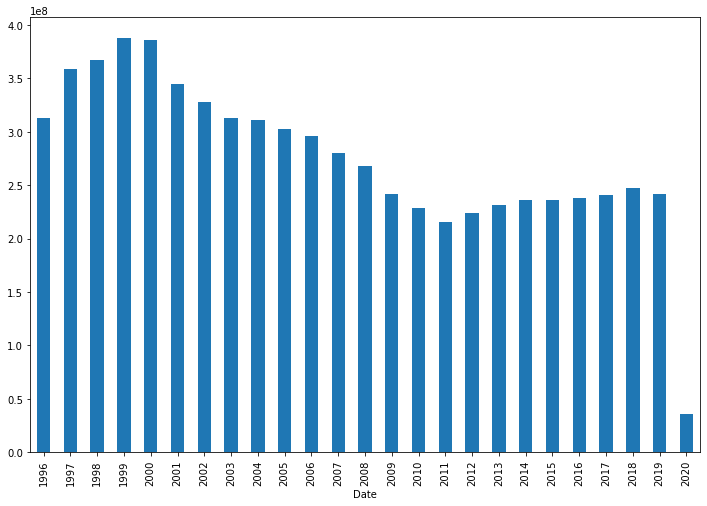

In [18]:
#Plotting a bar graph using direct plot method

plot.groupby(plot.Date.dt.year).Value.sum().plot(kind='bar', figsize=(12,8))

<AxesSubplot:xlabel='Date'>

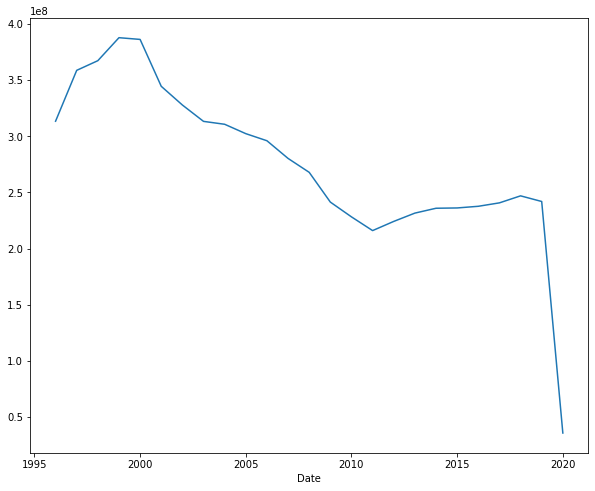

In [19]:
#Plotting a line plot by direct method

plot.groupby(plot.Date.dt.year).Value.sum().plot(kind='line', figsize=(10,8))

# 3. Count of people crossing in US in 2020

In [20]:
df_count_2020=plot[plot.Date.dt.year==2020]
df_count_2020.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
1037,Frontier,WA,3020,US-Canada Border,2020-01-01,Pedestrians,1
1035,Frontier,WA,3020,US-Canada Border,2020-01-01,Bus Passengers,240
1030,Fortuna,ND,3417,US-Canada Border,2020-01-01,Personal Vehicle Passengers,1400
1025,Fort Kent,ME,110,US-Canada Border,2020-01-01,Personal Vehicle Passengers,10907
1024,Fort Kent,ME,110,US-Canada Border,2020-01-01,Pedestrians,70


In [21]:
print('Total Number of people crossing US border in 2020: ',df_count_2020.Value.sum())

Total Number of people crossing US border in 2020:  35886649


# 3. Create a separate Data frame using column- Port . Sort the Data by Different Port in ascending order of the Data Frame.

In [22]:
df_pv=df.sort_values(by='Port Name', ascending=True)
df_pv.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414
293347,Alcan,AK,3104,US-Canada Border,2000-03-01,Rail Containers Empty,0
3913,Alcan,AK,3104,US-Canada Border,2019-09-01,Truck Containers Empty,496
243559,Alcan,AK,3104,US-Canada Border,2003-07-01,Truck Containers Full,737
3912,Alcan,AK,3104,US-Canada Border,2019-09-01,Personal Vehicles,3963


# 4.Count of People crossing in US, through different border.



In [23]:
df_border=df['Border'].unique()

In [24]:
print(df_border)

['US-Canada Border' 'US-Mexico Border']


In [25]:
#Direct method to get the value of US-Canada Border
#Dataframe 'plot' only contains data with passenger values in it

plot[plot.Border=='US-Canada Border'].Value.sum()

1682036237

# Longer method

Longer method to get the value of total people crossinf US-Canada Border

In [26]:
#Creating the columns with data from people entering US-Canada Border Only

df_us_can1=df[(df['Border']== 'US-Canada Border') & (df['Measure']=='Personal Vehicle Passengers')]
df_us_can2=df[(df['Border']== 'US-Canada Border') & (df['Measure']=='Bus Passengers')]
df_us_can3=df[(df['Border']== 'US-Canada Border') & (df['Measure']=='Pedestrians')]
df_us_can4=df[(df['Border']== 'US-Canada Border') & (df['Measure']=='Train Passengers')]

In [27]:
df_us_can1.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
354727,Whitetail,MT,3312,US-Canada Border,1996-01-01,Personal Vehicle Passengers,453
354661,Ambrose,ND,3410,US-Canada Border,1996-01-01,Personal Vehicle Passengers,1130
354606,Nighthawk,WA,3011,US-Canada Border,1996-01-01,Personal Vehicle Passengers,888
354595,Frontier,WA,3020,US-Canada Border,1996-01-01,Personal Vehicle Passengers,9728
354634,Morgan,MT,3319,US-Canada Border,1996-01-01,Personal Vehicle Passengers,728


In [28]:
#Adding the total number of people coming through US Canada Border


df_us_can_tot = df_us_can1['Value'].sum()+df_us_can2['Value'].sum()+df_us_can3['Value'].sum()+df_us_can4['Value'].sum()
print('Total number of people enetering through US-Canada Border: ',df_us_can_tot)

Total number of people enetering through US-Canada Border:  1682036237


In [29]:
#Direct method to get the value

plot[plot.Border=='US-Mexico Border'].Value.sum()

5190058574

# Longer method

In [30]:
#Creating the columns with data from people entering US-Mexico Border Only

df_us_mex1=df[(df['Border']== 'US-Mexico Border') & (df['Measure']=='Personal Vehicle Passengers')]
df_us_mex2=df[(df['Border']== 'US-Mexico Border') & (df['Measure']=='Bus Passengers')]
df_us_mex3=df[(df['Border']== 'US-Mexico Border') & (df['Measure']=='Pedestrians')]
df_us_mex4=df[(df['Border']== 'US-Mexico Border') & (df['Measure']=='Train Passengers')]

In [31]:
df_us_mex1.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
354649,Laredo,TX,2304,US-Mexico Border,1996-01-01,Personal Vehicle Passengers,1350041
354853,Calexico,CA,2503,US-Mexico Border,1996-01-01,Personal Vehicle Passengers,1765548
354755,Tornillo-Fabens,TX,2404,US-Mexico Border,1996-01-01,Personal Vehicle Passengers,151997
354747,El Paso,TX,2402,US-Mexico Border,1996-01-01,Personal Vehicle Passengers,2870450
354805,Progreso,TX,2309,US-Mexico Border,1996-01-01,Personal Vehicle Passengers,228542


In [32]:
#Adding the total number of people coming through US Mexico Border

df_us_mex_tot=df_us_mex1['Value'].sum()+df_us_mex2['Value'].sum()+df_us_mex3['Value'].sum()+df_us_mex4['Value'].sum()
print('Total number of people enetering through US-Mexico Border: ', df_us_mex_tot)

Total number of people enetering through US-Mexico Border:  5190058574


In [33]:
#calculating the total number of people entering US from both the borders

print('Total number of people enetering through US-Canada Border: ', df_us_can_tot )
print('Total number of people enetering through US-Mexico Border: ', df_us_mex_tot )


Total number of people enetering through US-Canada Border:  1682036237
Total number of people enetering through US-Mexico Border:  5190058574


In [34]:
#Checking if the total adds up to the total number

tot_check=df_us_mex_tot+df_us_can_tot
print(tot_pep.Value.sum())
print(tot_check)



6872094811
6872094811


# 5. Produce an excel/CSV file of the above analytics performed.



In [35]:
file_name1='BorderCrossingData.csv'
df_us_mex1.to_csv(file_name1)
